In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('Downloads/archive/deliveries.csv')
df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
5,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
6,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,7,BB McCullum,P Kumar,SC Ganguly,0,1,1,legbyes,0,NaN,NaN,NaN
7,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,BB McCullum,Z Khan,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
8,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
9,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN


In [7]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

C:\Users\saihi\AppData\Local\Temp\ipykernel_9780\1874611343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman_runs', y='batter', data=top_10_batsmen, palette='viridis')


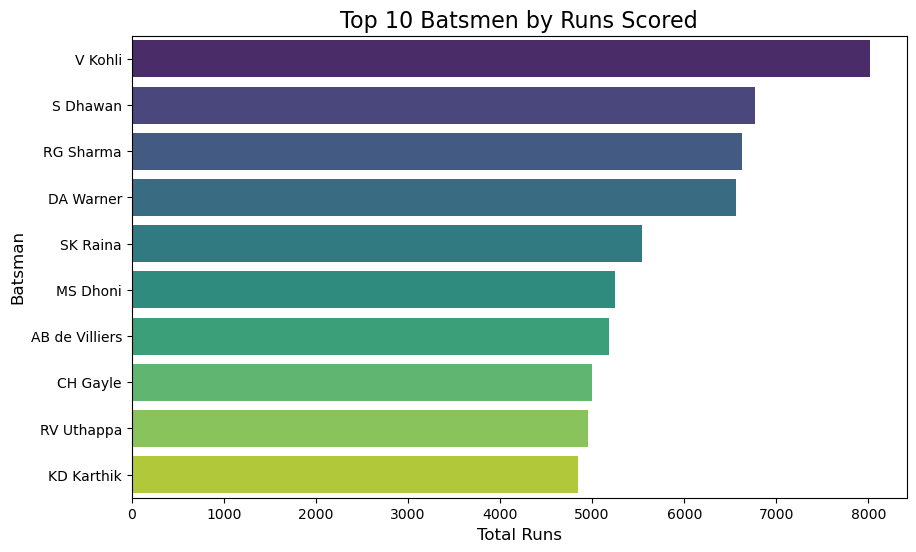

In [41]:
top_batsmen = df.groupby('batter')['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs', ascending=False)


top_10_batsmen=top_batsmen.head(10)
top_batsmen.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='batsman_runs', y='batter', data=top_10_batsmen, palette='viridis')
plt.title('Top 10 Batsmen by Runs Scored', fontsize=16)
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Batsman', fontsize=12)
plt.show()

In [13]:
wickets_df = df[df['is_wicket'] == 1]

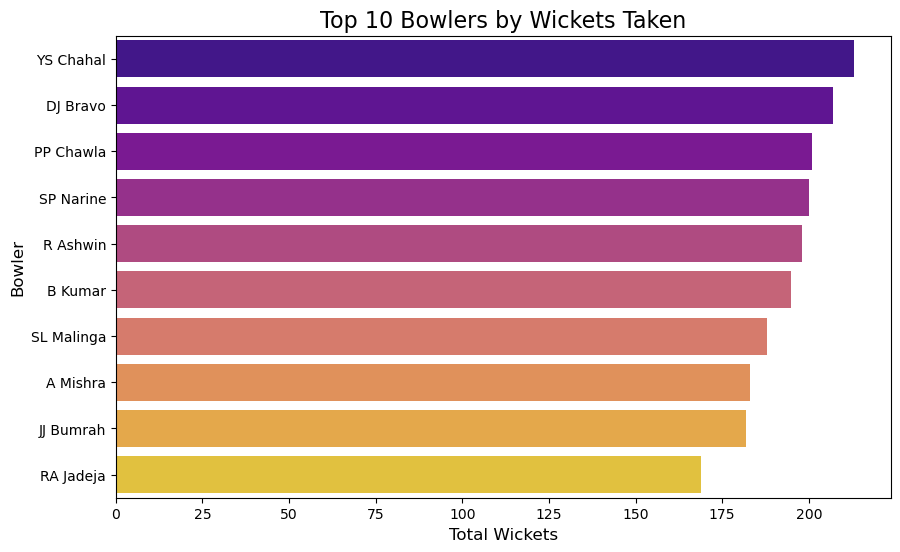

In [49]:
top_bowlers = wickets_df.groupby('bowler')['is_wicket'].count().reset_index().sort_values(by='is_wicket', ascending=False)

top_10_bowlers=top_bowlers.head(10)
top_bowlers.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='is_wicket', y='bowler',hue='bowler', data=top_10_bowlers, palette='plasma')
plt.title('Top 10 Bowlers by Wickets Taken', fontsize=16)
plt.xlabel('Total Wickets', fontsize=12)
plt.ylabel('Bowler', fontsize=12)
plt.show()

In [17]:
run_distribution = df.groupby('over')['total_runs'].sum().reset_index()

print(run_distribution)

    over  total_runs
0      0       13651
1      1       16163
2      2       17895
3      3       18415
4      4       18565
5      5       18528
6      6       14839
7      7       15981
8      8       16639
9      9       16353
10    10       16779
11    11       17076
12    12       17205
13    13       17634
14    14       18149
15    15       18472
16    16       19012
17    17       19559
18    18       19076
19    19       17765


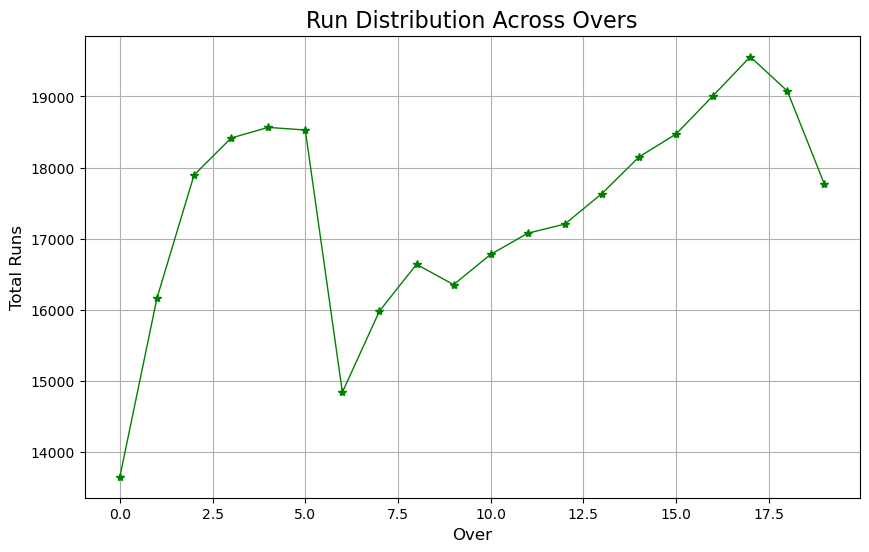

In [75]:
plt.figure(figsize=(10,6))
plt.plot(run_distribution['over'], run_distribution['total_runs'], marker='*', color='g', linestyle='-', linewidth=1)
plt.title('Run Distribution Across Overs', fontsize=16)
plt.xlabel('Over', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.grid(True)
plt.show()

In [19]:
extras_df = df[df['extra_runs'] > 0]

extras_breakdown = extras_df.groupby('extras_type')['extra_runs'].sum().reset_index()
extras_breakdown

,extras_type,extra_runs
0,byes,1270
1,legbyes,5242
2,noballs,1104
3,penalty,12
4,wides,10064


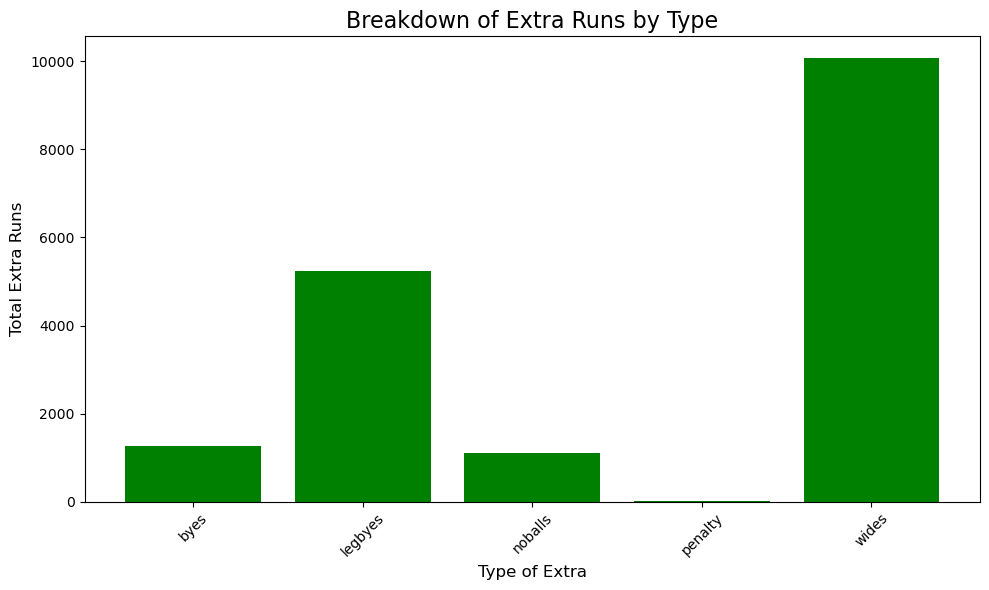

In [85]:
plt.figure(figsize=(10,6))
plt.bar(extras_breakdown['extras_type'], extras_breakdown['extra_runs'], color='green')
plt.title('Breakdown of Extra Runs by Type', fontsize=16)
plt.xlabel('Type of Extra', fontsize=12)
plt.ylabel('Total Extra Runs', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
dismissal_df = df[df['player_dismissed'].notnull()]

dismissal_breakdown = dismissal_df['dismissal_kind'].value_counts().reset_index()

dismissal_breakdown

,dismissal_kind,count
0,caught,8063
1,bowled,2212
2,run out,1114
3,lbw,800
4,caught and bowled,367
5,stumped,358
6,retired hurt,15
7,hit wicket,15
8,obstructing the field,3
9,retired out,3


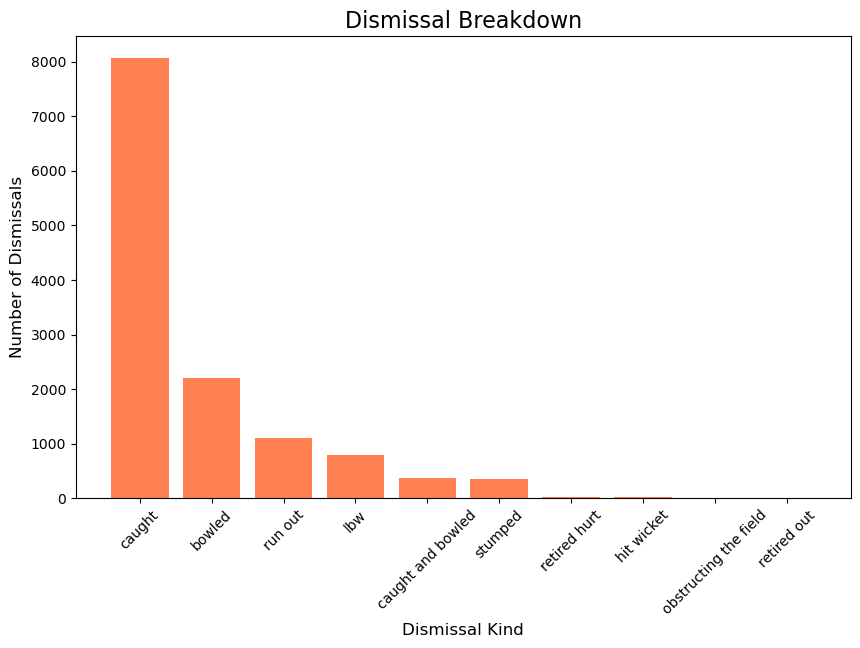

In [97]:
dismissal_breakdown.columns = ['Dismissal Kind', 'Count']

plt.figure(figsize=(10,6))

plt.bar(dismissal_breakdown['Dismissal Kind'], dismissal_breakdown['Count'], color='coral')

plt.title('Dismissal Breakdown', fontsize=16)
plt.xlabel('Dismissal Kind', fontsize=12)
plt.ylabel('Number of Dismissals', fontsize=12)
plt.xticks(rotation=45)

plt.show()

In [101]:
team_runs = df.groupby('batting_team')['total_runs'].sum().reset_index()

team_wickets = df[df['is_wicket'] == 1].groupby('bowling_team')['is_wicket'].count().reset_index()

team_performance = pd.merge(team_runs, team_wickets, left_on='batting_team', right_on='bowling_team', how='outer')

team_performance = team_performance.drop('bowling_team', axis=1)

team_performance.columns = ['Team', 'Total Runs Scored', 'Total Wickets Taken']

print(team_performance)


                           Team  Total Runs Scored  Total Wickets Taken
0           Chennai Super Kings              38629                 1481
1               Deccan Chargers              11463                  446
2                Delhi Capitals              14900                  586
3              Delhi Daredevils              24296                  912
4                 Gujarat Lions               4862                  151
5                Gujarat Titans               7757                  298
6               Kings XI Punjab              30064                 1076
7          Kochi Tuskers Kerala               1901                   74
8         Kolkata Knight Riders              39331                 1464
9          Lucknow Super Giants               7510                  264
10               Mumbai Indians              42176                 1591
11                Pune Warriors               6358                  238
12                 Punjab Kings               9536              